### **Workshop 4**

**download and extract Dataset**

In [1]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

--2024-03-07 13:44:00--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M   103MB/s    in 2.1s    

2024-03-07 13:44:03 (103 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [2]:
!mkdir 'flowers dataset'

In [3]:
!ls

 flower_photos.tgz  'flowers dataset'   sample_data


In [4]:
!tar -xzvf "flower_photos.tgz" -C "flowers dataset"

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

**Import classes labels**

In [11]:
import os
import cv2 as opencv
import numpy as np
import matplotlib.pyplot as plt


# Import label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [6]:
classes = os.listdir("/content/flowers dataset/flower_photos")

classes = [class_name for class_name in classes if class_name.split(".")[-1] != "txt"]

classes = sorted(classes)

labels = label_encoder.fit_transform(classes)

print(classes)
print(labels)
mapping = dict(zip(label_encoder.classes_, labels))

print(mapping)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
[0 1 2 3 4]
{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}


**Load Dataset images**

**Function to rescale all images to same size i.e 244 x 244**

In [7]:
def rescale_image(image):

  image = opencv.resize(image,(244,244))
  image = image/255.0
  return image
  pass

In [8]:
root_path = "/content/flowers dataset/flower_photos"

dataset = []
X = []
Y = []
for class_name in classes:

  folder_path = os.path.join(root_path,class_name)
  print(folder_path)
  # print("total images = ", len(os.listdir(folder_path)))
  print("Loading Images")
  for image_name in os.listdir(folder_path):
    image_path = os.path.join(folder_path,image_name)
    image = opencv.imread(image_path)
    image = opencv.cvtColor(image,code=opencv.COLOR_BGR2RGB)
    image = rescale_image(image)
    label = mapping[class_name]

    #dataset.append([image,label])
    X.append(image)
    Y.append(label)
    #break
    pass
  #break
  pass


/content/flowers dataset/flower_photos/daisy
Loading Images
/content/flowers dataset/flower_photos/dandelion
Loading Images
/content/flowers dataset/flower_photos/roses
Loading Images
/content/flowers dataset/flower_photos/sunflowers
Loading Images
/content/flowers dataset/flower_photos/tulips
Loading Images


In [9]:
X_complete = np.asarray(X)
Y_complete = np.asarray(Y)

In [10]:
del X, Y

**Dataset Cross validation split**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_complete,Y_complete ,
                                   random_state=42,
                                   test_size=0.20,
                                   shuffle=True)

In [13]:
del X_complete, Y_complete

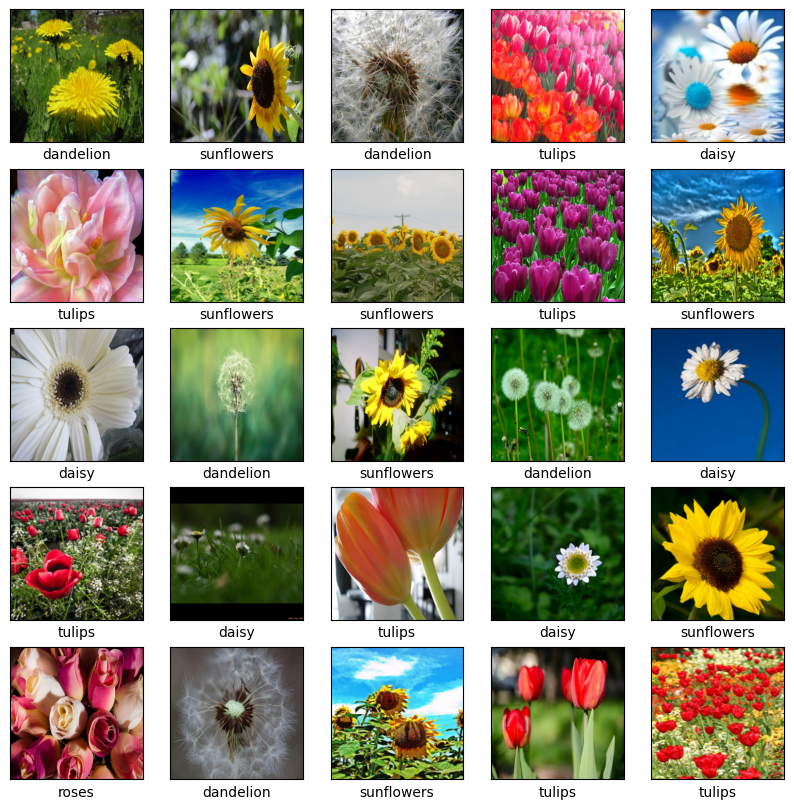

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(classes[Y_train[i]])
plt.show()

**Image data generator to create batches**

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
dataset_images_DataGenerator = ImageDataGenerator(rotation_range=10,
                                                  width_shift_range=0.13,
                                                  height_shift_range=0.13,
                                                  zoom_range=0.13,
                                                  horizontal_flip=False)


images_DataGenerator_Batch = dataset_images_DataGenerator.flow(X_train, Y_train,
                                                               batch_size=32,seed=42)


# Validation Image Data generator
validation_set_images_DataGenerator = ImageDataGenerator()
validation_images_DataGenerator_Batch = validation_set_images_DataGenerator.flow(X_test, Y_test,
                                                               batch_size=32,seed=42)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, BatchNormalization, Dropout, Flatten
from keras.losses import SparseCategoricalCrossentropy

from keras.optimizers import SGD, Adam, RMSprop, Adagrad

In [ ]:
img_height = 244
img_width = 244
num_classes = len(classes)


model = Sequential([
  Input(shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 122, 122, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [ ]:
model.compile(optimizer='adam',
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit_generator(images_DataGenerator_Batch,
                    steps_per_epoch=len(X_train) / 32, epochs=50,
                    validation_data=validation_images_DataGenerator_Batch,
                              validation_steps = len(X_test)/32)

<ipython-input-19-e5deb0aef4b9>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(images_DataGenerator_Batch,


Epoch 1/50
91/91 [==============================] - 50s 433ms/step - loss: 1.2571 - accuracy: 0.4673 - val_loss: 1.0206 - val_accuracy: 0.5695
Epoch 2/50
91/91 [==============================] - 42s 454ms/step - loss: 1.0196 - accuracy: 0.5981 - val_loss: 0.8913 - val_accuracy: 0.6431
Epoch 3/50
91/91 [==============================] - 50s 540ms/step - loss: 0.9281 - accuracy: 0.6322 - val_loss: 0.8198 - val_accuracy: 0.7044
Epoch 4/50
91/91 [==============================] - 41s 442ms/step - loss: 0.8811 - accuracy: 0.6567 - val_loss: 0.7273 - val_accuracy: 0.7098
Epoch 5/50
91/91 [==============================] - 38s 411ms/step - loss: 0.8012 - accuracy: 0.6860 - val_loss: 0.7507 - val_accuracy: 0.7275
Epoch 6/50
91/91 [==============================] - 42s 451ms/step - loss: 0.7720 - accuracy: 0.7047 - val_loss: 0.7111 - val_accuracy: 0.7207
Epoch 7/50
91/91 [==============================] - 38s 417ms/step - loss: 0.7326 - accuracy: 0.7176 - val_loss: 0.7076 - val_accuracy: 0.7439

In [ ]:
del X_train, X_test, Y_train , Y_test, model

In [ ]:
import pickle as pkl

# save dictionary to person_data.pkl file
with open('flowers_dataset_history.pkl', 'wb') as fp:
    pkl.dump(history, fp)
    print('training history saved successfully to file')

training history saved successfully to file


In [ ]:
from google.colab import files
files.download('flowers_dataset_history.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Adding regularization techniques to generalize the training of model on validation set**

In [18]:
from keras.layers import BatchNormalization, Dropout, Activation, Dropout

In [19]:
img_height = 244
img_width = 244
num_classes = len(classes)


model = Sequential([
  Input(shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same'),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.1),
  MaxPooling2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(num_classes)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 244, 244, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 244, 244, 16)      0         
                                                                 
 dropout (Dropout)           (None, 244, 244, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 122, 122, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4

In [20]:
model.compile(optimizer='adam',
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

generalized_model_history = model.fit_generator(images_DataGenerator_Batch,
                    steps_per_epoch=len(X_train) / 32, epochs=50,
                    validation_data=validation_images_DataGenerator_Batch,
                              validation_steps = len(X_test)/32)

<ipython-input-20-d8371b7d8698>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  generalized_model_history = model.fit_generator(images_DataGenerator_Batch,


Epoch 1/50
91/91 [==============================] - 49s 442ms/step - loss: 7.0044 - accuracy: 0.4084 - val_loss: 2.2376 - val_accuracy: 0.2411
Epoch 2/50
91/91 [==============================] - 41s 442ms/step - loss: 1.8626 - accuracy: 0.4632 - val_loss: 1.7217 - val_accuracy: 0.3161
Epoch 3/50
91/91 [==============================] - 42s 458ms/step - loss: 1.5790 - accuracy: 0.4908 - val_loss: 1.5486 - val_accuracy: 0.3270
Epoch 4/50
91/91 [==============================] - 46s 497ms/step - loss: 1.3417 - accuracy: 0.5129 - val_loss: 1.2704 - val_accuracy: 0.4714
Epoch 5/50
91/91 [==============================] - 43s 464ms/step - loss: 1.2521 - accuracy: 0.5347 - val_loss: 1.2574 - val_accuracy: 0.4796
Epoch 6/50
91/91 [==============================] - 42s 459ms/step - loss: 1.2073 - accuracy: 0.5453 - val_loss: 1.1112 - val_accuracy: 0.6035
Epoch 7/50
91/91 [==============================] - 42s 458ms/step - loss: 1.1143 - accuracy: 0.5749 - val_loss: 1.1406 - val_accuracy: 0.5272

In [21]:
del X_train, X_test, Y_train , Y_test, model

In [22]:
import pickle as pkl

# save dictionary to person_data.pkl file
with open('generalized_model_history.pkl', 'wb') as fp:
    pkl.dump(generalized_model_history, fp)
    print('training history saved successfully to file')

training history saved successfully to file


In [23]:
from google.colab import files
files.download('generalized_model_history.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Plotting validation accuracy and loss graphs**

In [1]:
import matplotlib.pyplot as plt
import pickle as pkl

In [8]:
flowers_dataset_training_history = pkl.load(open('flowers_dataset_history.pkl', 'rb'))

generalized_model_history = pkl.load(open('generalized_model_history.pkl', 'rb'))

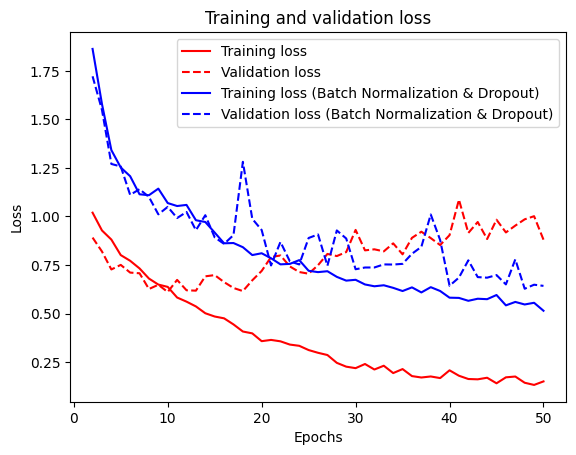

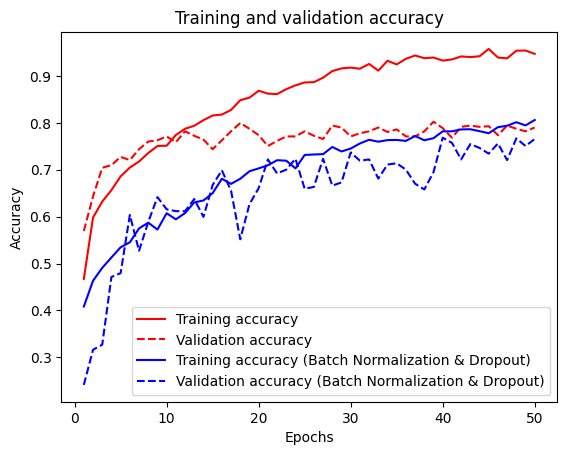

In [12]:
##################################################################

#plot the training and validation IoU and loss at each epoch
loss = flowers_dataset_training_history.history['loss']
val_loss = flowers_dataset_training_history.history['val_loss']

generalized_model_loss = generalized_model_history.history['loss']
generalized_model_val_loss = generalized_model_history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs[1:], loss[1:], 'r', label='Training loss')
plt.plot(epochs[1:], val_loss[1:], 'r', label='Validation loss', linestyle='dashed')

plt.plot(epochs[1:], generalized_model_loss[1:], 'b', label='Training loss (Batch Normalization & Dropout)')
plt.plot(epochs[1:], generalized_model_val_loss[1:], 'b', label='Validation loss (Batch Normalization & Dropout)', linestyle='dashed')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = flowers_dataset_training_history.history['accuracy']
val_acc = flowers_dataset_training_history.history['val_accuracy']

generalized_model_acc = generalized_model_history.history['accuracy']
generalized_model_val_acc = generalized_model_history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy', linestyle='dashed')

plt.plot(epochs, generalized_model_acc, 'b', label='Training accuracy (Batch Normalization & Dropout)')
plt.plot(epochs, generalized_model_val_acc, 'b', label='Validation accuracy (Batch Normalization & Dropout)' , linestyle='dashed')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################

### **Task 2**

**Training pretrained CNN networks on Cats and Dogs Dataset**

In [1]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2024-03-07 18:35:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.159.207, 142.251.120.207, 142.251.161.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.159.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   175MB/s    in 0.4s    

2024-03-07 18:35:47 (175 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
!ls

cats_and_dogs_filtered.zip  sample_data


In [3]:
!unzip '/content/cats_and_dogs_filtered.zip'

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

In [7]:
training_datagenerator = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        )

validation_datagenerator = ImageDataGenerator(rescale=1 / 255.0)


In [8]:
training_images_path = '/content/cats_and_dogs_filtered/train/'

validation_images_path = '/content/cats_and_dogs_filtered/validation/'

In [9]:
batch_size = 8
training_set_datagenerator = training_datagenerator.flow_from_directory(
    directory=training_images_path,
    target_size=(400, 400),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

validation_set_datagenerator = validation_datagenerator.flow_from_directory(
    directory=validation_images_path,
    target_size=(400, 400),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
    seed=42
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


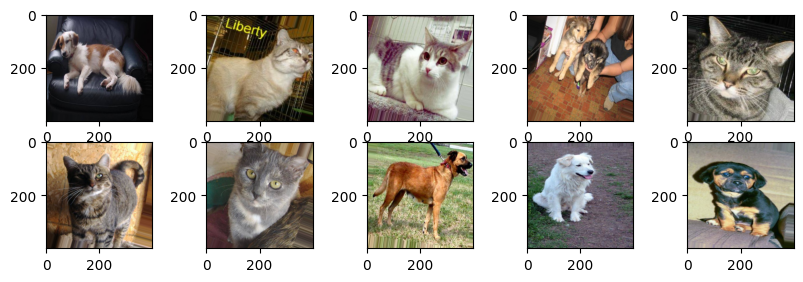

In [12]:
plt.figure(figsize=(10,8))
#Plots our figures
for i in range(1,11):
  plt.subplot(5, 5, i)
  batch = training_set_datagenerator.next()
  image_ = batch[0][0]
  # plt.imshow(image_, cmap='gray')
  plt.imshow(image_, cmap='gray')
plt.show()

In [13]:
from keras.applications import ResNet101, ResNet50, VGG16, InceptionV3, VGG19, MobileNetV2

In [14]:
resnet_model = Sequential()

pretrained_model= ResNet50(include_top=False,
                   input_shape=(400, 400, 3),
                   pooling='avg',classes=2,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False
        pass


resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
resnet_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
resnet_model.add(Dense(2))

print(resnet_model.summary())



resnet_model.compile(optimizer='adam',
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_resnet_model = resnet_model.fit_generator(training_set_datagenerator,
                    validation_data = validation_set_datagenerator,
                    steps_per_epoch = training_set_datagenerator.n//training_set_datagenerator.batch_size,
                    validation_steps = validation_set_datagenerator.n//validation_set_datagenerator.batch_size,
                    epochs=50)

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 24145410 (92.11 MB)
Trainable params: 557698 (2.13 MB)
Non-trainable params: 23587712 (89.98 MB)
____________

<ipython-input-14-ea149281b201>:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_resnet_model = resnet_model.fit_generator(training_set_datagenerator,


Epoch 1/50
250/250 [==============================] - 115s 400ms/step - loss: 0.7529 - accuracy: 0.5190 - val_loss: 0.6797 - val_accuracy: 0.5670
Epoch 2/50
250/250 [==============================] - 98s 392ms/step - loss: 0.6976 - accuracy: 0.5110 - val_loss: 0.6777 - val_accuracy: 0.5570
Epoch 3/50
250/250 [==============================] - 98s 392ms/step - loss: 0.6927 - accuracy: 0.5275 - val_loss: 0.6744 - val_accuracy: 0.6320
Epoch 4/50
250/250 [==============================] - 97s 389ms/step - loss: 0.6922 - accuracy: 0.5350 - val_loss: 0.6829 - val_accuracy: 0.5810
Epoch 5/50
250/250 [==============================] - 97s 389ms/step - loss: 0.6941 - accuracy: 0.5165 - val_loss: 0.6930 - val_accuracy: 0.5020
Epoch 6/50
250/250 [==============================] - 107s 426ms/step - loss: 0.6938 - accuracy: 0.5005 - val_loss: 0.6929 - val_accuracy: 0.5020
Epoch 7/50
250/250 [==============================] - 98s 393ms/step - loss: 0.6942 - accuracy: 0.4990 - val_loss: 0.6927 - val_

In [15]:
import pickle as pkl

# save dictionary to person_data.pkl file
with open('history_resnet_model.pkl', 'wb') as fp:
    pkl.dump(history_resnet_model, fp)
    print('training history saved successfully to file')

training history saved successfully to file


In [16]:
from google.colab import files
files.download('history_resnet_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

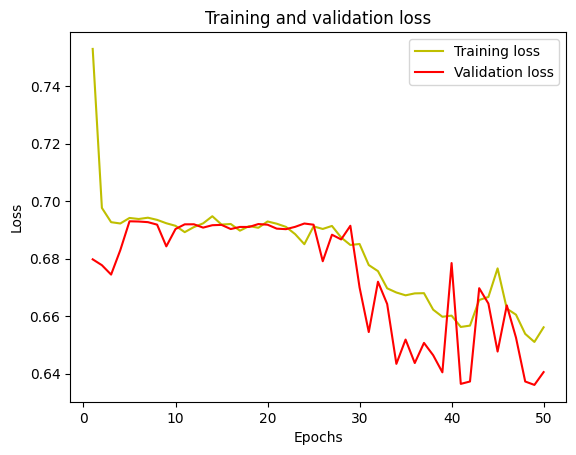

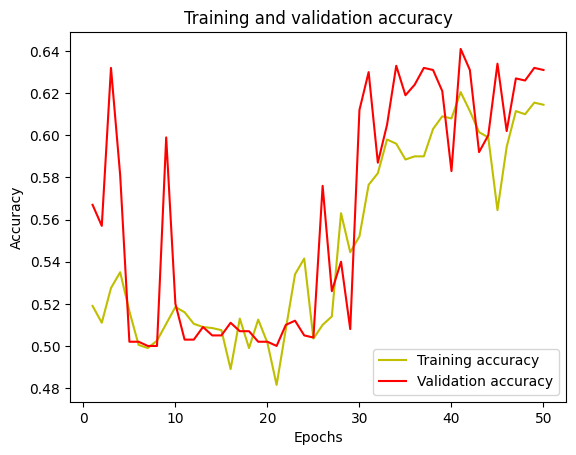

In [17]:
##################################################################

#plot the training and validation IoU and loss at each epoch
loss = history_resnet_model.history['loss']
val_loss = history_resnet_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_resnet_model.history['accuracy']
val_acc = history_resnet_model.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################